In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy as sp
from scipy import stats

Lo = 600 #mm
DLo = 1 # mm 
DT = 0.5 # C


def Error_linealizacion(x,y):
    yp = np.mean(y)*np.ones(len(y))
    ei2 = np.sum((y-yp)**2)
    ey = np.sqrt(ei2/(len(y)-2))
    xi2 = np.sum(x**2); Xi2 = np.sum(x)**2
    db = ey*np.sqrt((len(y))/(len(y)*xi2-Xi2)) #pendiente
    da = ey*np.sqrt((xi2)/(len(y)*xi2-Xi2)) #punto de corte
    return np.array([da,db])


def resultados(x,y,nombre):
    T1Err= 1; taErr= x*np.sqrt((DLo/Lo)**2 +(DT/x)**2)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x,y)
    polynomial = np.poly1d([slope, intercept])
    line = polynomial(x)
    plt.plot(x, line, 'r-', label ="Linealizacion $R ={0:.3f}$".format(r_value)) 
    plt.errorbar(x, y, T1Err, taErr,ecolor = "b",fmt='+b',capsize = 2)



    plt.plot(x,y,"b.")
    plt.grid(True)
    plt.xlabel("Temperatura $[^{o}C]$")
    plt.ylabel("Longitud   $[ 10^{-2}$ mm]")
    plt.title(nombre)
    plt.legend()
    plt.savefig(nombre)
    
    print"Pendiente",("{:.3e}".format(slope/60000)),"Error", ("{:.3e}".format(Error_linealizacion(x,y)[1]/60000))
    print"Punto de corte",("{:.3e}".format(intercept/60000)),"Error", ("{:.3e}".format(Error_linealizacion(x,y)[0]/60000))


    

El cambio de la longitud con la temperatura para un material sólido está dada por 

$$\frac{l_{f}-l_{o}}{l_{o}} = \alpha (T_{f}-T_{o}) \qquad \frac{\Delta l}{l_{o}} = \alpha \Delta T$$


# Datos del laboratorio

In [2]:

Tc = np.array([79.,77.,76.,75.,74.,73.,72.,72.,71.,70.,69.,68.,
              68.,67.,65.,65.,64.,63.,63.,62.,60.,59.,58.,57.,56.,55.,
               54.,53.,51.,50.,49.,48.,46.,45.,44.,43.,42.,42.,42.])

Tb = np.array([85.,84.,82.,81.,80.,79.,78.,77.,76.,75.,74.,74.,73.,72.,
               71.,70.,70.,69.,68.,67.,66.,65.,64.,64.,63.,62.,61.,60.,
              59.,58.,58.,57.,56.,55.,54.,53.])

TAl = np.array([85.,84.,83.,82.,81.,81.,79.,79.,79.,78.,77.,76.,75.,75,
               74.,73.,73.,72.,71.,71.,70.,69.,69.,68.,67.,67.,66.,65.,
               65.,64.,63.,62.,62.,61.,61.,60.])

TFe = np.array([84.,81.,79.,78.,76.,75.,73.,72.,70.,69.,68.,66.,65.,
               63.,62.,60.,59.,57.,55.,54.,52.,50.,48.,46.,45.,43.,41.,
               40.,37.,36.])

Lc = np.arange(2,41) # 10**2 mm 
Lb = np.arange(0,36)
LAl = np.arange(0,36)
LFe = np.arange(0,30)

# Cobre

Pendiente -1.673e-05 Error 2.759e-06
Punto de corte 1.357e-03 Error 1.688e-04


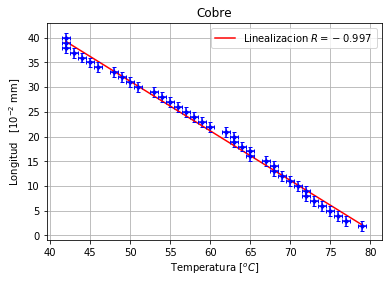

In [130]:
resultados(Tc,Lc,"Cobre")

# Bronce

Pendiente -1.909e-05 Error 3.279e-06
Punto de corte 1.596e-03 Error 2.260e-04


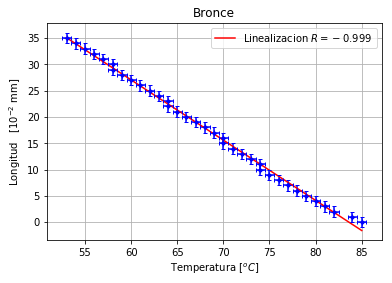

In [131]:
resultados(Tb,Lb,"Bronce")

# Aluminio

Pendiente -2.381e-05 Error 4.089e-06
Punto de corte 2.002e-03 Error 2.953e-04


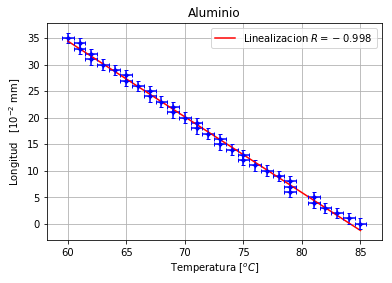

In [132]:
resultados(TAl,LAl,"Aluminio")

# Hierro

Pendiente -1.039e-05 Error 1.966e-06
Punto de corte 8.663e-04 Error 1.213e-04


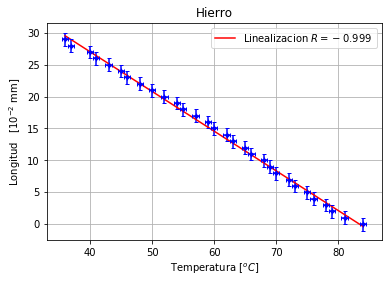

In [133]:
resultados(TFe,LFe,"Hierro")

## Ecuaciones encontradas a partir de la linealización

Asumiendo que  $l_{o} = (600 \pm 1) mm $

### Cobre

$$\Delta l = l_{o}\left[(17 \pm 3) \times 10^{-6}\frac{1}{^{o}C}\right]\Delta T$$

### Bronce

$$\Delta l = l_{o}\left[(19 \pm 3) \times 10^{-6}\frac{1}{^{o}C}\right]\Delta T$$

### Aluminio

$$\Delta l = l_{o}\left[(24 \pm 4) \times 10^{-6}\frac{1}{^{o}C}\right]\Delta T$$

### Hierro

$$\Delta l = l_{o}\left[(10 \pm 2) \times 10^{-6}\frac{1}{^{o}C}\right]\Delta T$$





